In [1]:
%load_ext autoreload
%autoreload 2
from imports import *
from fatigueLife_vs_feature_analysis import *

In [2]:
fatigue

,Surface Condition,specimen,Frequency (Hz),Strain Amplitude (mm/mm),Fatigue Life (cylces),Reversal to failure (2Nf),ispolished
0,As-built,V02,5.0,0.0040,45859,91718,False
1,As-built,V10,5.0,0.0040,49177,98354,False
2,As-built,V04,7.5,0.0030,91222,182444,False
3,As-built,V16,7.5,0.0030,110013,220026,False
4,As-built,V08,7.5,0.0030,136464,272928,False
5,As-built,V12,8.0,0.0025,192404,384808,False
6,As-built,V18,8.0,0.0025,259128,518256,False
7,As-built,V14,8.0,0.0025,320856,641712,False
8,As-built,V06,10.0,0.0020,5000000,10000000,False
9,Half-polished,V07,5.0,0.0040,50916,101832,True


In [35]:
def get_all_sample_files(name, ispolished):
    files = [x for x in glob.glob("../data/experiment_03/*info") if '500X' in x]
    if ispolished:
        files = [x for x in files if "polished" in x.lower()]
    else:
        files = [x for x in files if "polished" not in x.lower()]
    specimen = [x for x in files if name in x]
    return specimen

In [47]:
speciment = 'V05'
ispolished = False
x = get_all_sample_files('V05', ispolished)
assert len(x) == len(set(x))
assert sum([speciment in a for a in x]) == 4
assert sum(["Polished" in a for a in x]) == (4 if ispolished else 0)

In [56]:
from itertools import chain
all_samples = [get_all_sample_files(*x) for x in fatigue[['specimen', 'ispolished']].values]
all_samples = list(chain(*all_samples))

In [58]:
from additive.feature_functions import feature_functions_functions as fff

In [69]:
def load_data(file):
    data = joblib.load(file)
    try:
        image = np.array(data['value'].x)[500:-500]
    except:
        image = data[500:-500]
    return image

def get_all_features(x, fff):
    return compute({k: delayed(f)(x) for k, f in fff.items()})[0]

In [70]:
out_b = bag.from_sequence(all_samples).map(load_data).map(get_all_features, fff=fff)

In [71]:
out = out_b.compute()

In [75]:
from additive.utility import get_file_info
global_stats = get_file_info(pd.DataFrame(out).assign(file=all_samples), col='file')

In [111]:
cols = ['specimen', 'ispolished']
roughness_and_fatigue = global_stats.groupby(cols).max().reset_index().merge(fatigue, on=cols)
roughness_and_fatigue

,specimen,ispolished,T,RL,mean,median,mode_1d,mode_2d,ra_1d,ra_2d,...,rsk_1d,rsk_2d,rv_1d,rv_2d,file,Surface Condition,Frequency (Hz),Strain Amplitude (mm/mm),Fatigue Life (cylces),Reversal to failure (2Nf)
0,V01,True,T2,R,180.013870,180.700531,21.091904,30.0,17.002026,17.842505,...,-1.246237,-0.646040,179.726730,181.012909,../data/experiment_03/Polished_V01_T2_Right(To...,Half-polished,10.0,0.0020,5000000,10000000
1,V02,False,T2,R,336.227692,336.300751,1.033020,2.0,18.206764,18.719345,...,-0.336363,-0.340010,242.818817,321.623840,../data/experiment_03/V02_T2_Right(Top)_500X_3...,As-built,5.0,0.0040,45859,91718
2,V03,True,T2,R,173.340683,175.908371,7.009757,12.0,7.661055,10.933570,...,-2.060849,-0.736558,157.675003,170.241348,../data/experiment_03/Polished_V03_T2_Right(To...,Half-polished,7.5,0.0030,163123,326246
3,V04,False,T2,R,234.065262,234.132065,4.125168,5.0,17.546272,18.273165,...,-1.087296,-1.004973,234.699982,235.064041,../data/experiment_03/V04_T2_Right(Top)_500X_3...,As-built,7.5,0.0030,91222,182444
4,V05,True,T2,R,212.543396,214.816452,7.211436,12.0,7.921264,9.924087,...,-3.496201,-1.561989,186.160294,208.058151,../data/experiment_03/Polished_V05_T2_Right(To...,Half-polished,7.5,0.0030,153540,307080
5,V06,False,T2,R,255.273682,255.861084,0.836800,8.0,20.618788,20.972631,...,-1.015628,-0.677148,255.853195,256.273712,../data/experiment_03/V06_T2_Right(Top)_500X_3...,As-built,10.0,0.0020,5000000,10000000
6,V07,True,T2,R,209.219528,210.137451,15.610383,17.0,12.180012,13.789445,...,-2.053156,-1.243680,210.216858,210.219559,../data/experiment_03/Polished_V07_T2_Right(To...,Half-polished,5.0,0.0040,50916,101832
7,V08,False,T2,R,197.728485,198.164001,1.638851,2.0,17.759052,18.287325,...,-2.080912,-1.875932,198.728363,198.728516,../data/experiment_03/V08_T2_Right(Top)_500X_3...,As-built,7.5,0.0030,136464,272928
8,V09,True,T2,R,190.411560,194.891663,6.569575,9.0,8.703461,11.763356,...,-4.008146,-2.171514,191.306412,191.411575,../data/experiment_03/Polished_V09_T2_Right(To...,Half-polished,5.0,0.0040,60992,121984
9,V10,False,T2,R,175.799408,175.803528,0.725760,-1.0,25.128937,25.700090,...,-0.012093,0.111264,176.799637,176.799438,../data/experiment_03/V10_T2_Right(Top)_500X_3...,As-built,5.0,0.0040,49177,98354


In [115]:
def plot_fatigue_vs_roughness(data, x):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.reshape(-1)
    for ax, strain in zip(axes, sorted(data['Strain Amplitude (mm/mm)'].unique())):
        df = data[data['Strain Amplitude (mm/mm)']==strain]
        sns.scatterplot(x=x(df), y=np.log(df['Reversal to failure (2Nf)']), ax=ax)
        ax.set_title(f"straint = {strain}")

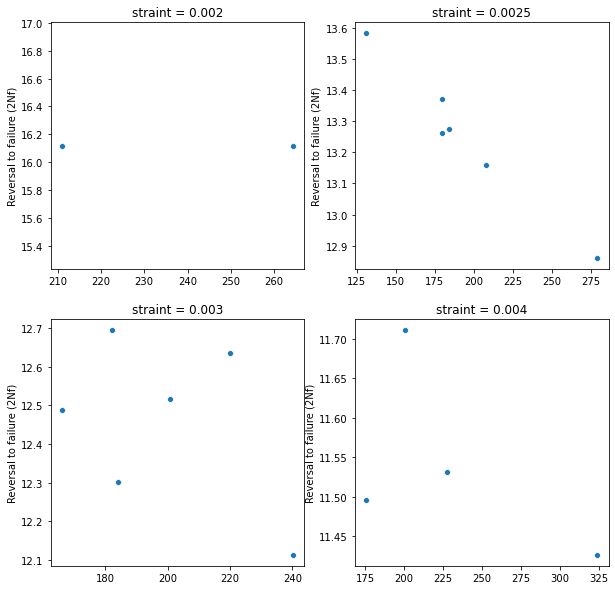

In [118]:
plot_fatigue_vs_roughness(roughness_and_fatigue, lambda x: x['rv_2d']+x['mode_2d'])